#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

#### Importinng the Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
df.shape

(2227, 3)

In [4]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


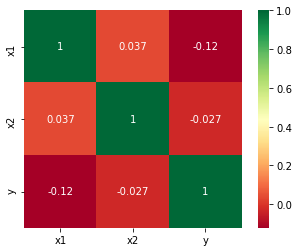

In [6]:
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)

From the above heatmap we can infer that there is no correlation between x1,x2 and y

In [7]:
df.cov()

,x1,x2,y
x1,5.615990e+03,8.345746e+06,-4.515335
x2,8.345746e+06,8.900213e+12,-39606.680644
y,-4.515335e+00,-3.960668e+04,0.246781


In [8]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


### Missing Value Treatment

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

<AxesSubplot:xlabel='x1', ylabel='Density'>

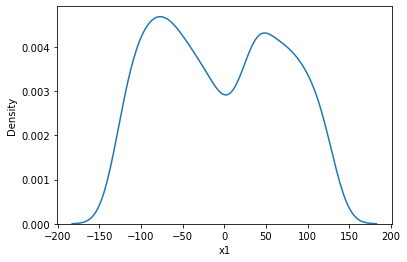

In [12]:
sns.kdeplot(df.x1)

<AxesSubplot:xlabel='x2', ylabel='Density'>

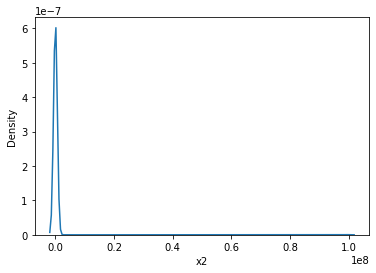

In [13]:
sns.kdeplot(df.x2)

In [14]:
sns.displot

<function seaborn.distributions.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)>

### Standardization

In [15]:
output = df['y']
s_df = df.drop("y",axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(s_df)
print(standardized_data.shape)

(2219, 2)


In [17]:
s_df.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


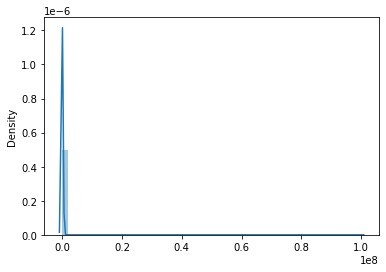

In [18]:
sns.distplot(df)
plt.show()

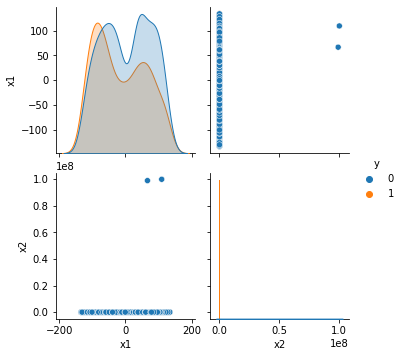

In [19]:
sns.pairplot(df, hue='y')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(s_df,output,test_size = 0.25,random_state = 0)

### Logistic Regression

In [22]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LR_acc = accuracy_score(y_test, y_pred)
print("accuracy score is",LR_acc)

[[264  44]
 [177  70]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.70       308
           1       0.61      0.28      0.39       247

    accuracy                           0.60       555
   macro avg       0.61      0.57      0.55       555
weighted avg       0.61      0.60      0.56       555

accuracy score is 0.6018018018018018


### SVM with Linear Kernal

In [25]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = svclassifier.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
SVMl_acc = accuracy_score(y_test, y_pred)
print("accuracy score is",SVMl_acc)

[[307   1]
 [247   0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       308
           1       0.00      0.00      0.00       247

    accuracy                           0.55       555
   macro avg       0.28      0.50      0.36       555
weighted avg       0.31      0.55      0.40       555

accuracy score is 0.5531531531531532


### SVM with RBF Kernal

In [28]:
from sklearn.svm import SVC
svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X_train, y_train)

SVC()

In [29]:
y_pred = svclassifier1.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
SVMr_acc = accuracy_score(y_test, y_pred)
print("accuracy score is",SVMr_acc)

[[308   0]
 [247   0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       308
           1       0.00      0.00      0.00       247

    accuracy                           0.55       555
   macro avg       0.28      0.50      0.36       555
weighted avg       0.31      0.55      0.40       555

accuracy score is 0.554954954954955


C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_depth = 5)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [32]:
y_test_pred = DTclassifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
DT_acc = accuracy_score(y_test, y_pred)
print("accuracy score is",DT_acc)

[[308   0]
 [247   0]]

C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



              precision    recall  f1-score   support

           0       0.55      1.00      0.71       308
           1       0.00      0.00      0.00       247

    accuracy                           0.55       555
   macro avg       0.28      0.50      0.36       555
weighted avg       0.31      0.55      0.40       555

accuracy score is 0.554954954954955


C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-Nearest Neighbours

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier()
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = KNNclassifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
KNN_acc = accuracy_score(y_test, y_pred)
print("accuracy score is",KNN_acc)

[[293  15]
 [ 16 231]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       308
           1       0.94      0.94      0.94       247

    accuracy                           0.94       555
   macro avg       0.94      0.94      0.94       555
weighted avg       0.94      0.94      0.94       555

accuracy score is 0.9441441441441442


In [37]:
comparison = [LR_acc,SVMl_acc,SVMr_acc,DT_acc,KNN_acc]
label=['Logistic Regression','SVM Linear','SVM rbf','Decision Tree','K Nearest Neighbours']
ACC=pd.Series(comparison,label)

<AxesSubplot:>

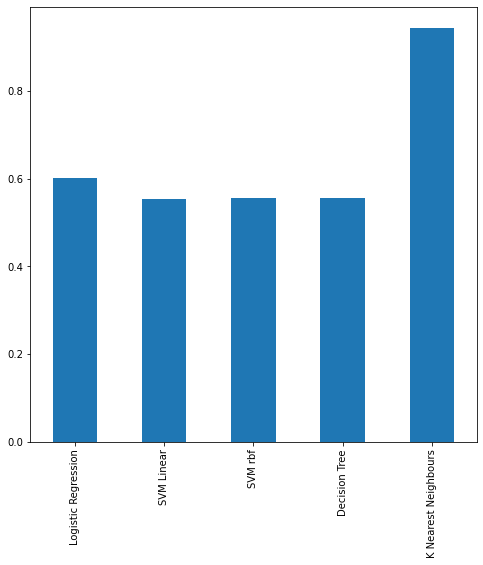

In [38]:
plt.figure(figsize=(8,8))
ACC.plot.bar()